# HDDM tutorial.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import hddm

print(hddm.__version__)

import kabuki

print(kabuki.__version__)

0.9.6
0.6.5


## Loading data

In [3]:
!head PD_PS.csv

head: PD_PS.csv: No such file or directory


In [5]:
data = pd.DataFrame(hddm.load_csv("PD_PS.csv"))
del data["conf"]
data = hddm.utils.flip_errors(data)

In [6]:
data.head(10)

,subj_idx,stim,rt,response,prer1,prer2,theta,cue2,dbs,dbs_effect,dbs_effect_inv,dbs_inv
0,0,LL,1.210,1,0,1,0.656275,1,1,1,-1,0
1,0,WL,1.630,1,0,1,-0.327889,0,1,1,-1,0
2,0,WW,1.030,1,0,1,-0.480285,0,1,1,-1,0
3,0,WL,2.770,1,0,1,1.927427,1,1,1,-1,0
4,0,WW,-1.140,0,0,1,-0.213236,1,1,1,-1,0
5,0,WL,1.150,1,0,1,-0.436204,0,1,1,-1,0
6,0,LL,2.000,1,0,1,-0.274479,1,1,1,-1,0
7,0,WL,-1.040,0,0,1,0.666957,1,1,1,-1,0
8,0,WW,0.857,1,0,1,0.118617,0,1,1,-1,0
9,0,WL,-1.500,0,0,1,0.823626,1,1,1,-1,0


In [7]:
subj_idx = data.subj_idx.unique()
data = data[data.subj_idx.isin(subj_idx[:8])]
data.subj_idx.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

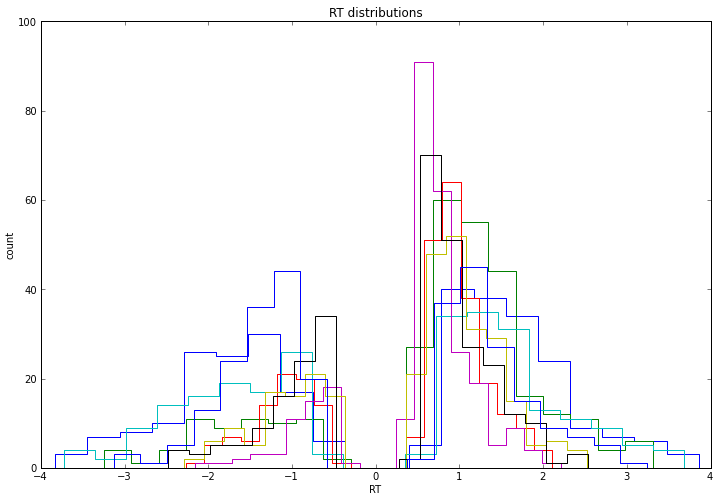

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="RT", ylabel="count", title="RT distributions")
for i, subj_data in data.groupby("subj_idx"):
    ax.hist(subj_data.rt, bins=20, histtype="step")

## The Drift-Diffusion model

![](http://ski.clps.brown.edu/hddm_docs/_images/DDM_drifts_w_labels.svg)

In [9]:
m = hddm.HDDM(data)

Here is what the graphical model representation looks like:

![](http://ski.clps.brown.edu/hddm_docs/_images/hier_model.svg)
$$\mu_{a} \sim \mathcal{N}(0, 1)$$
$$\mu_{z} \sim \mathcal{N}(0, 1)$$
$$\mu_{v} \sim \mathcal{N}(0, 1)$$
$$\mu_{ter} \sim \mathcal{N}(0, 1)$$
$$\mu_{sv} \sim \mathcal{N}(0, 1)$$
$$\mu_{sz} \sim \mathcal{N}(0, 1)$$
$$\mu_{ster} \sim \mathcal{N}(0, 1)$$

$$\sigma_{a} \sim \mathcal{U}(1e^{-10}, 100)$$
$$\sigma_{z} \sim \mathcal{U}(1e^{-10}, 100)$$
$$\sigma_{v} \sim \mathcal{U}(1e^{-10}, 100)$$
$$\sigma_{ter} \sim \mathcal{U}(1e^{-10}, 100)$$
$$\sigma_{sv} \sim \mathcal{U}(1e^{-10}, 100)$$
$$\sigma_{sz} \sim \mathcal{U}(1e^{-10}, 100)$$
$$\sigma_{ster} \sim \mathcal{U}(1e^{-10}, 100)$$

$$a_{i} \sim \mathcal{N}(\mu_{a}, \sigma_{a})$$
$$z_{i} \sim \mathcal{N}(\mu_{z}, \sigma_{z})$$
$$v_{i} \sim \mathcal{N}(\mu_{v}, \sigma_{v})$$
$$ter_{i} \sim \mathcal{N}(\mu_{ter}, \sigma_{ter})$$
$$sv_{i} \sim \mathcal{N}(\mu_{sv}, \sigma_{sv})$$
$$sz_{i} \sim \mathcal{N}(\mu_{sz}, \sigma_{sz})$$
$$ster_{i} \sim \mathcal{N}(\mu_{ster}, \sigma_{ster})$$

$$RT_{i, j} \sim wfpt(a_{i}, z_{i}, v_{i}, ter_{i}, sv_{i}, sz_{i}, ster_{i})$$

In [10]:
# find a good starting point
m.find_starting_values()
# start drawing 5000 samples and discarding 2000 as burn-in
m.sample(5000, burn=2000)

[****************100%******************]  5000 of 5000 complete

In [11]:
m.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.884788,0.154485,1.600214,1.791213,1.878498,1.970293,2.210027,0.003570
a_var,0.209870,0.078265,0.112427,0.158241,0.193662,0.240952,0.403242,0.001848
a_subj.0,2.388225,0.058939,2.260717,2.345047,2.385096,2.430441,2.506841,0.004040
a_subj.1,2.126979,0.069324,2.014756,2.077206,2.124537,2.174642,2.274736,0.005816
a_subj.2,1.748940,0.050970,1.650488,1.715661,1.747534,1.777846,1.860085,0.003691
a_subj.3,2.241691,0.061749,2.121790,2.192895,2.244337,2.285855,2.362495,0.004464
a_subj.4,1.495803,0.053771,1.402862,1.456942,1.491516,1.528551,1.620839,0.004218
a_subj.5,1.765590,0.045867,1.687824,1.732887,1.762557,1.799858,1.857065,0.003516
a_subj.6,1.616975,0.049147,1.519604,1.583187,1.614655,1.649832,1.705043,0.003780
a_subj.7,1.868760,0.050017,1.775076,1.831650,1.872910,1.901670,1.967292,0.003560


Plotting a
Plotting a_var
Plotting a_subj.0
Plotting a_subj.1
Plotting a_subj.2
Plotting a_subj.3
Plotting a_subj.4
Plotting a_subj.5
Plotting a_subj.6
Plotting a_subj.7
Plotting v
Plotting v_var
Plotting v_subj.0
Plotting v_subj.1
Plotting v_subj.2
Plotting v_subj.3
Plotting v_subj.4
Plotting v_subj.5
Plotting v_subj.6
Plotting v_subj.7
Plotting t
Plotting t_var
Plotting t_subj.0
Plotting t_subj.1
Plotting t_subj.2
Plotting t_subj.3
Plotting t_subj.4
Plotting t_subj.5
Plotting t_subj.6
Plotting t_subj.7


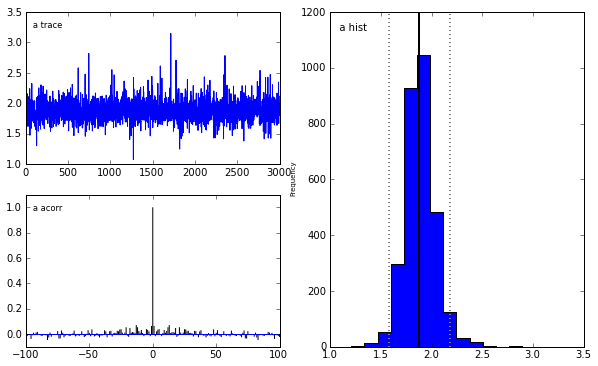

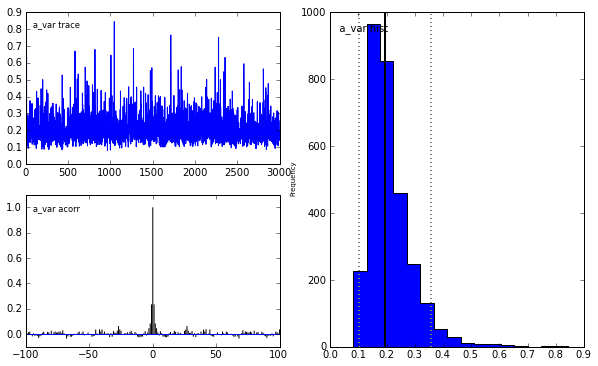

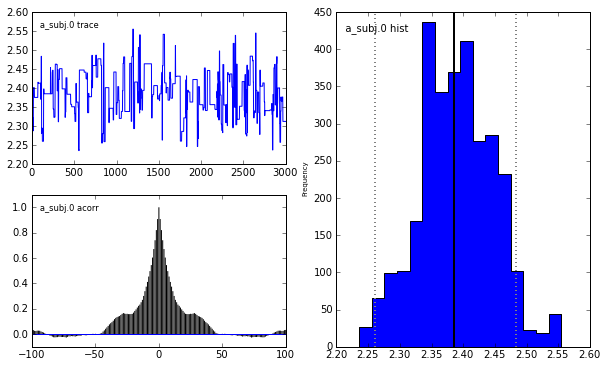

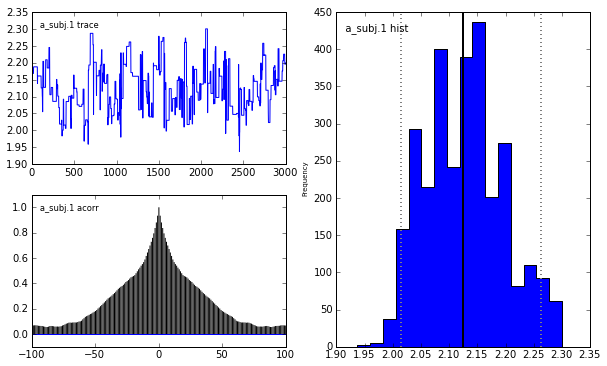

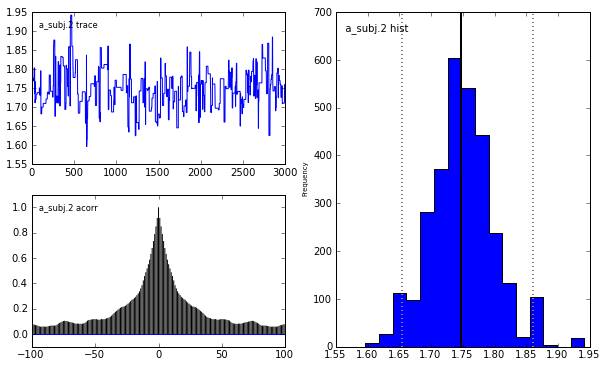

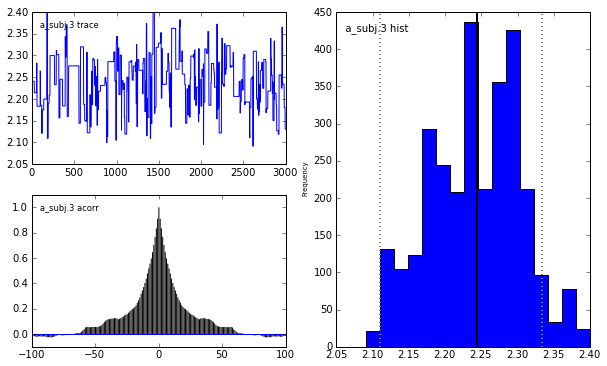

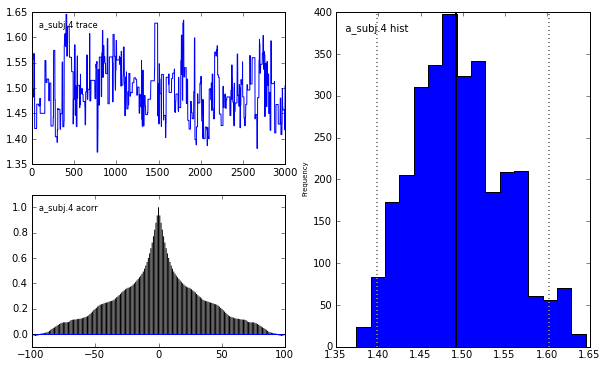

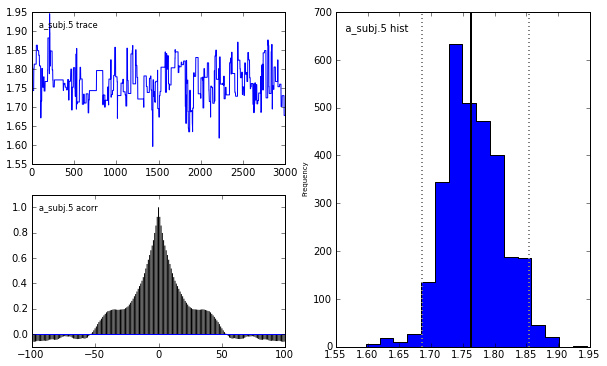

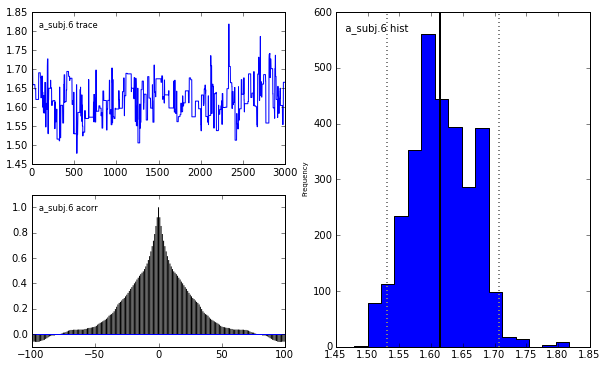

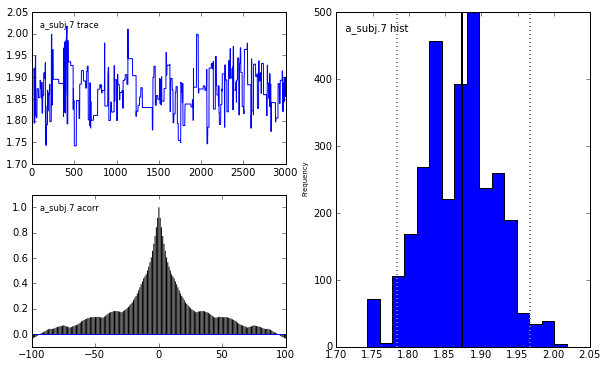

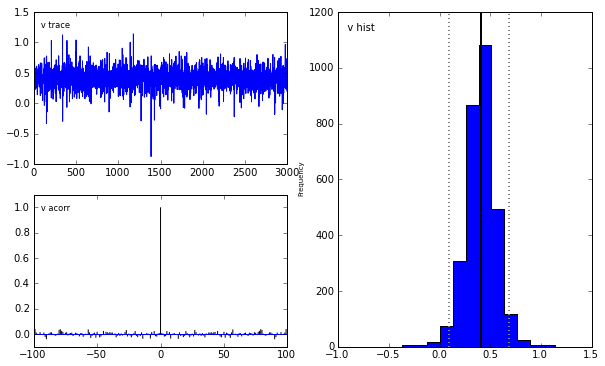

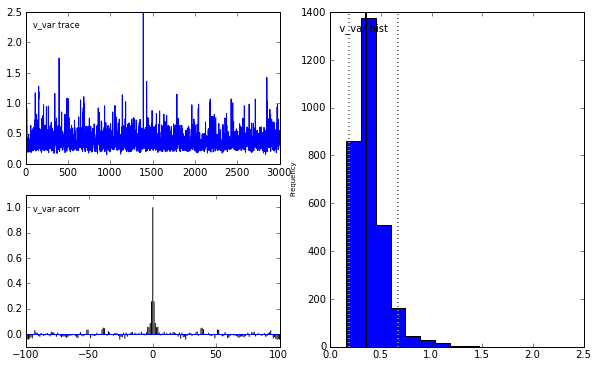

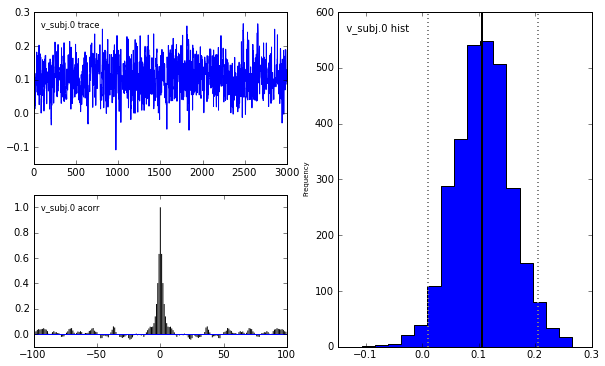

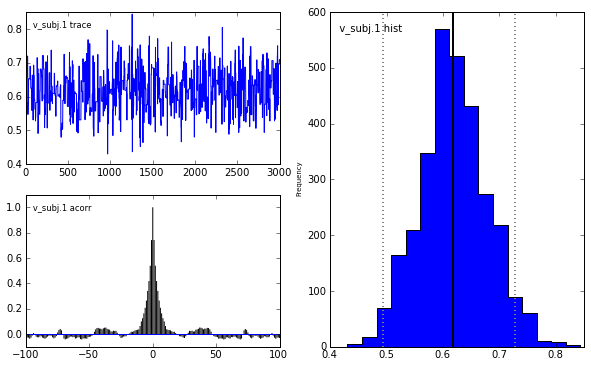

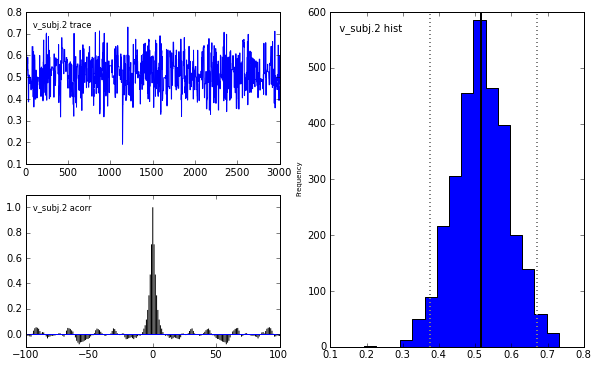

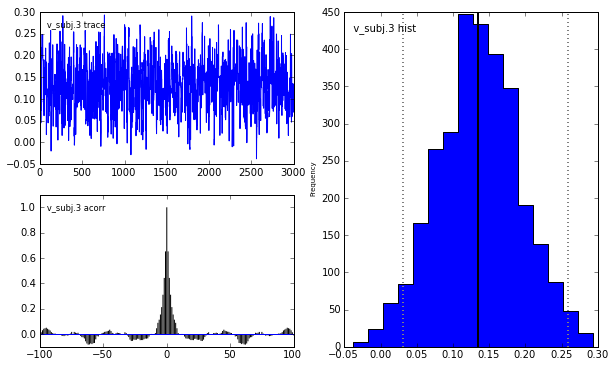

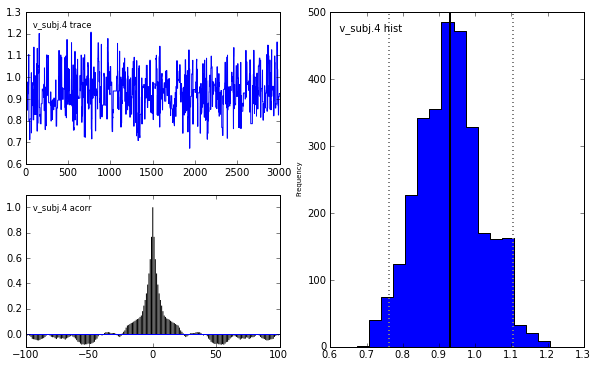

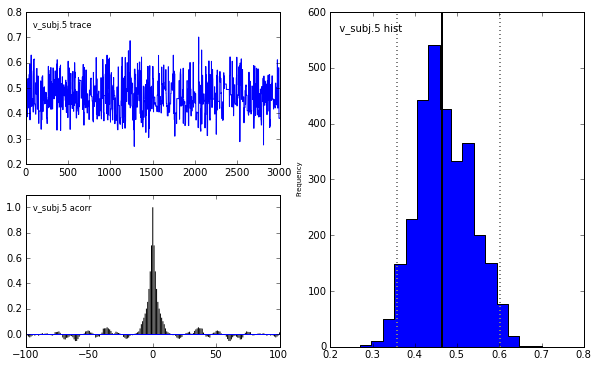

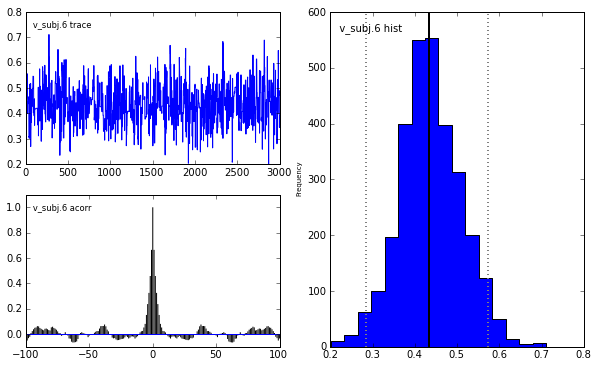

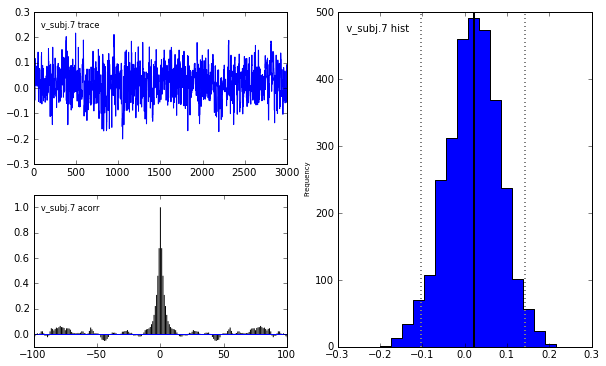

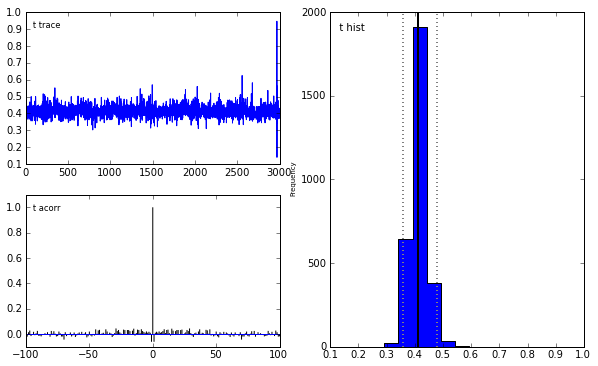

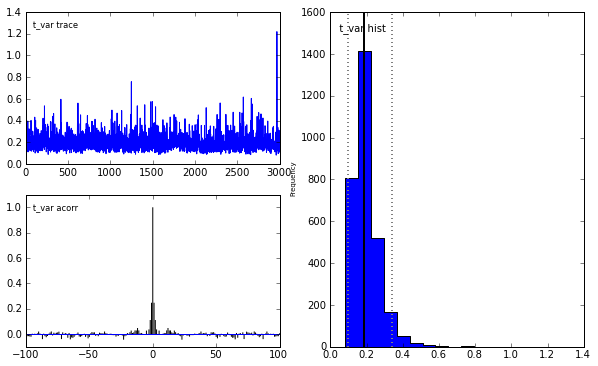

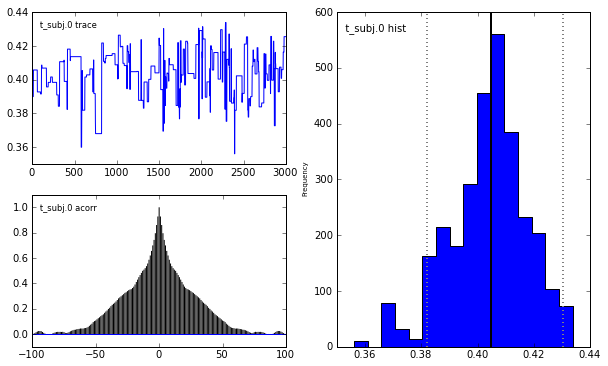

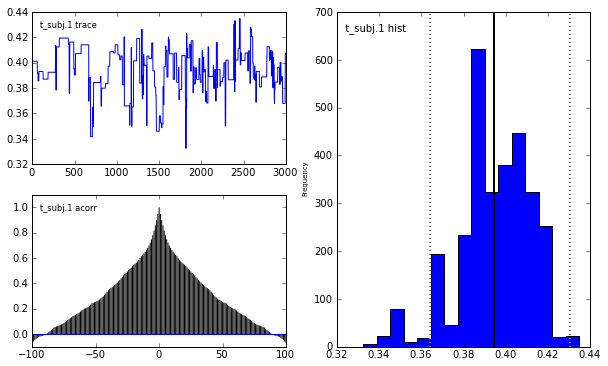

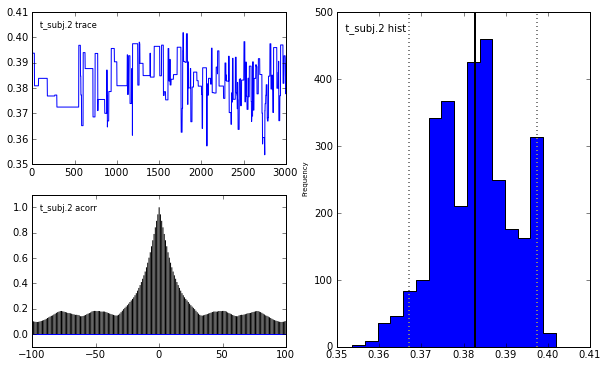

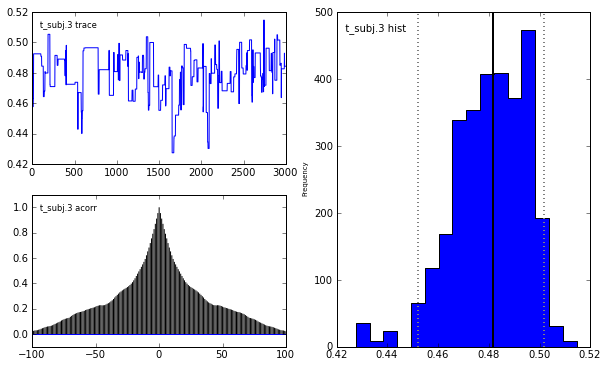

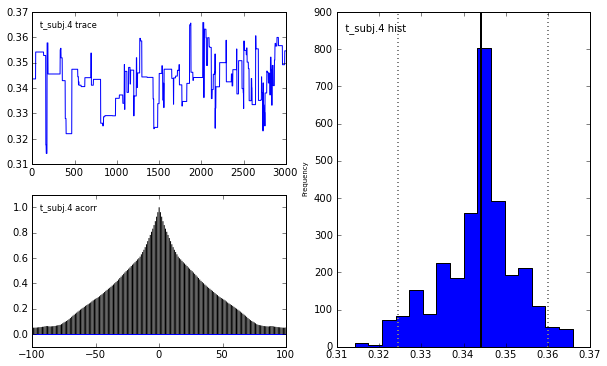

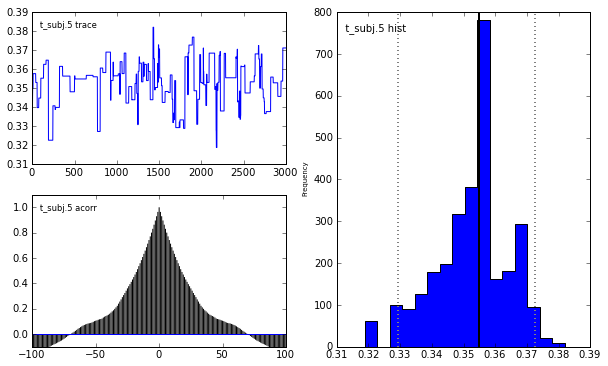

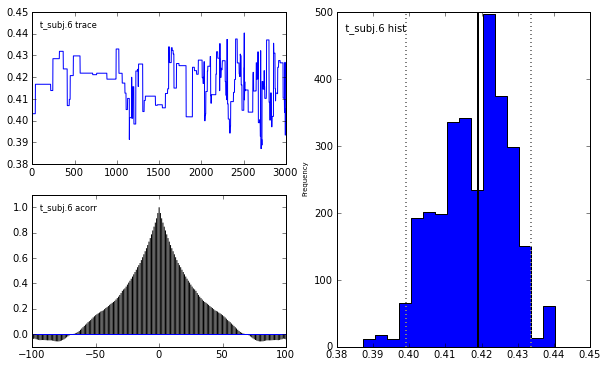

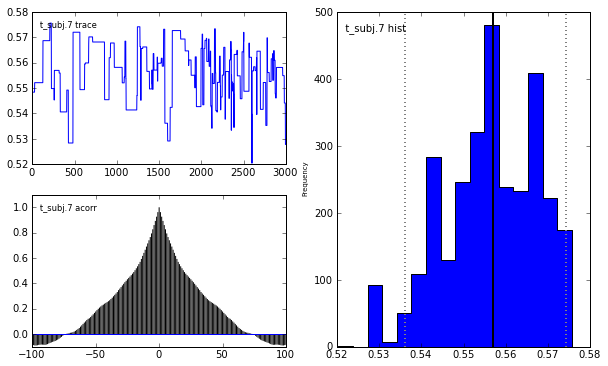

In [12]:
m.plot_posteriors(plot_subjs=True)

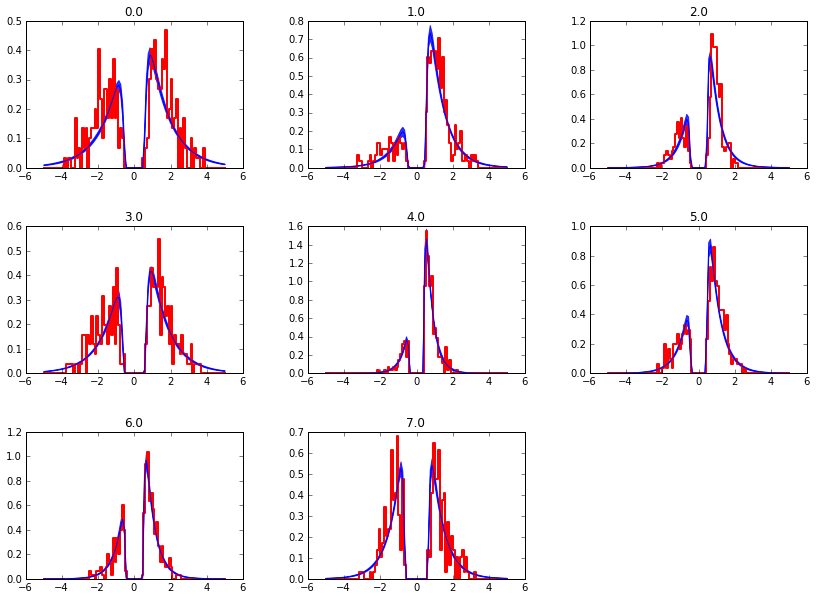

In [13]:
m.plot_posterior_predictive(columns=3, figsize=(14, 10))

In [14]:
m_stim = hddm.HDDM(data, depends_on={"v": "stim"})
m_stim.find_starting_values()
m_stim.sample(5000, burn=3000)

[****************100%******************]  5000 of 5000 complete

In [15]:
m_stim.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.910192,0.149151,1.632340,1.826513,1.905144,1.988533,2.227471,0.003293
a_var,0.201772,0.077252,0.111235,0.150701,0.183206,0.231331,0.402214,0.002576
a_subj.0,2.375617,0.065522,2.267145,2.330408,2.370367,2.412057,2.509956,0.005163
a_subj.1,2.172344,0.056630,2.068351,2.128913,2.166012,2.209181,2.281785,0.004566
a_subj.2,1.781573,0.051742,1.689544,1.740661,1.787171,1.818745,1.878488,0.003899
a_subj.3,2.263053,0.064986,2.151272,2.210688,2.256557,2.312354,2.389038,0.005111
a_subj.4,1.521669,0.052055,1.427011,1.480417,1.529088,1.559818,1.610601,0.004587
a_subj.5,1.786698,0.051772,1.705788,1.746592,1.778893,1.821030,1.902289,0.004162
a_subj.6,1.608594,0.047379,1.519637,1.574444,1.608235,1.637161,1.709044,0.004079
a_subj.7,1.894857,0.047800,1.811258,1.860407,1.891957,1.920149,1.994741,0.003838


Plotting a
Plotting a_var
Plotting v(LL)
Plotting v(WL)
Plotting v(WW)
Plotting v_var
Plotting t
Plotting t_var


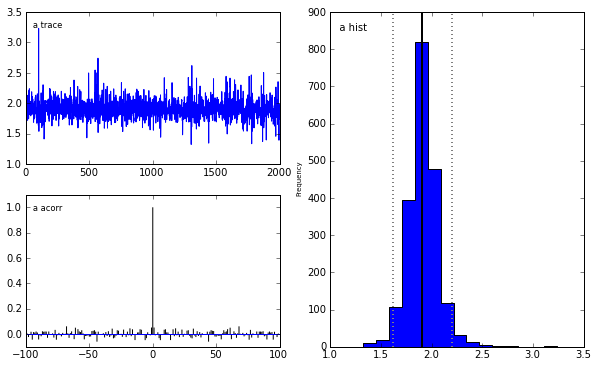

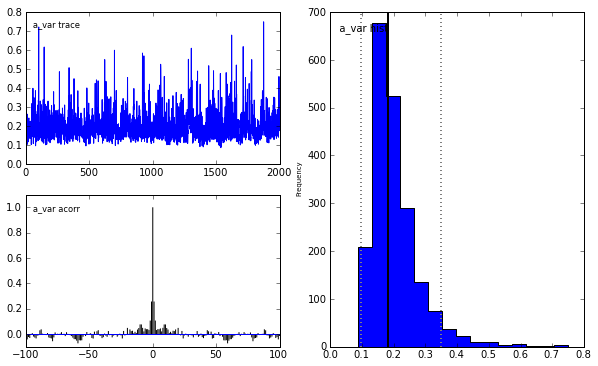

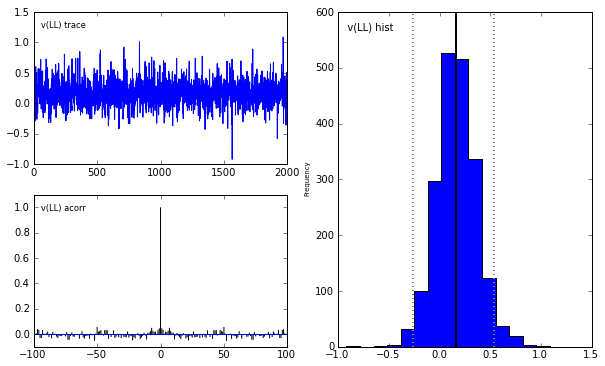

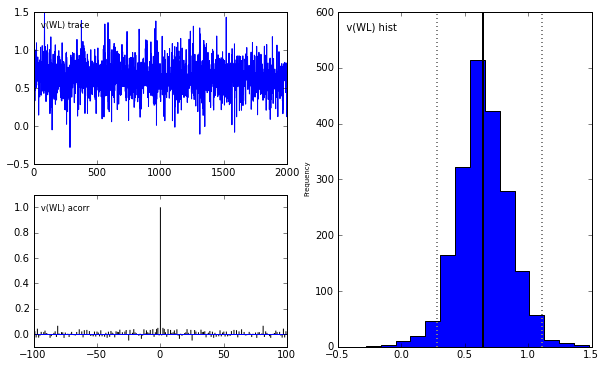

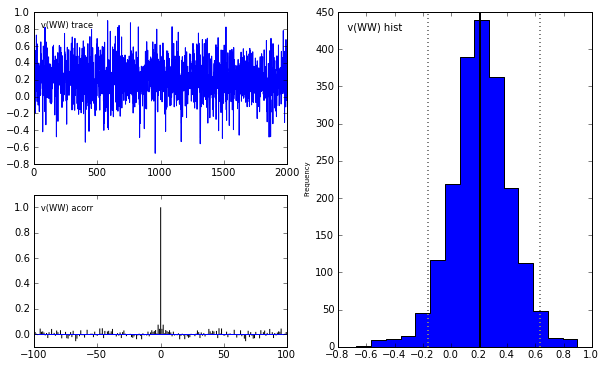

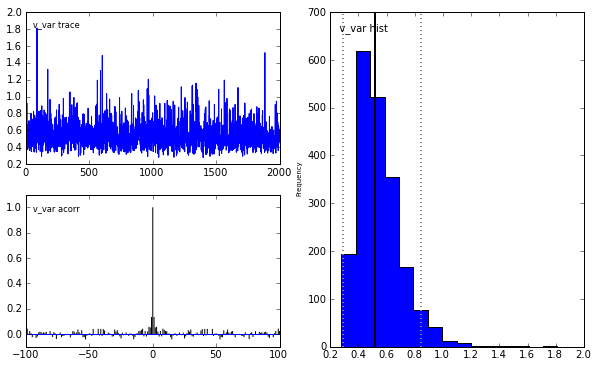

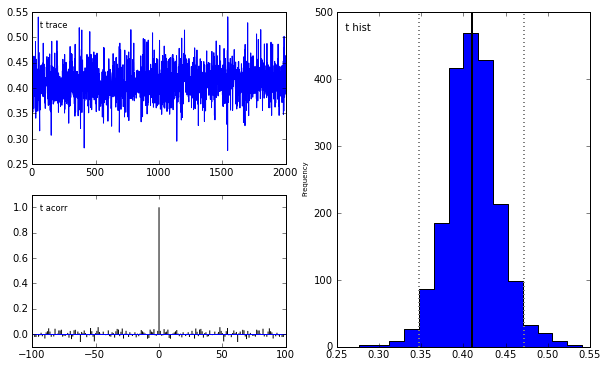

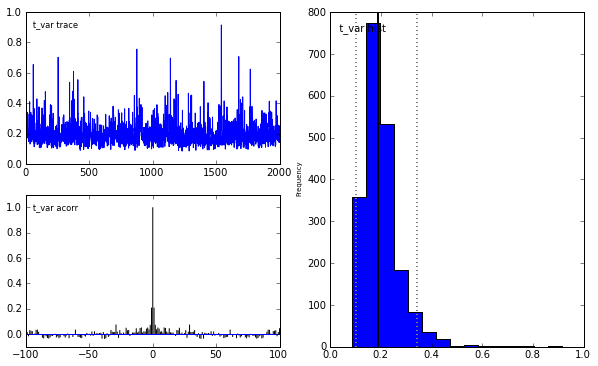

In [16]:
m_stim.plot_posteriors()

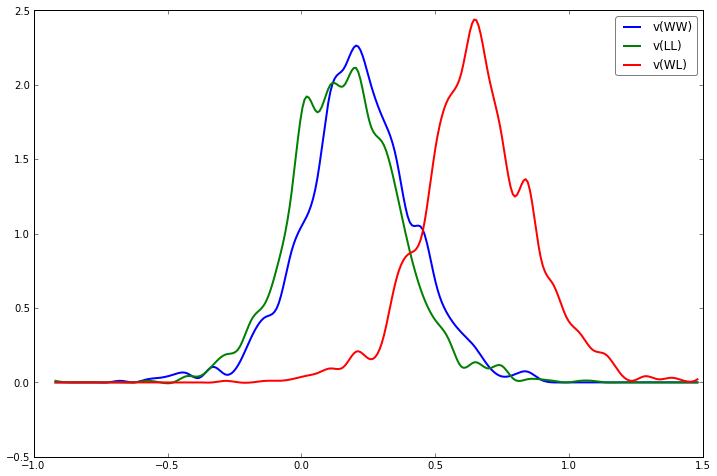

In [17]:
kabuki.analyze.plot_posterior_nodes(m_stim.nodes_db.node[["v(WW)", "v(LL)", "v(WL)"]])

In [18]:
# Add new column conf to data
data["conf"] = "LC"
data.conf[data.stim.isin(["LL", "WW"])] = "HC"

In [19]:
m_conf = hddm.HDDM(data, depends_on={"v": "conf"})
m_conf.find_starting_values()
m_conf.sample(5000, burn=3000)

[****************100%******************]  5000 of 5000 complete

In [20]:
m_conf.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.907066,0.151867,1.615777,1.812710,1.899989,1.990651,2.236887,0.003515
a_var,0.207300,0.074567,0.114167,0.156830,0.189127,0.237836,0.412035,0.002359
a_subj.0,2.385110,0.068699,2.266422,2.329890,2.378854,2.438070,2.527146,0.005537
a_subj.1,2.155383,0.066070,2.031057,2.115858,2.145350,2.194213,2.309043,0.005325
a_subj.2,1.780362,0.047107,1.703819,1.743664,1.777755,1.808408,1.887040,0.003941
a_subj.3,2.255954,0.070775,2.137182,2.204690,2.255334,2.301632,2.415520,0.005453
a_subj.4,1.505424,0.050945,1.396674,1.471526,1.509700,1.544088,1.598505,0.004213
a_subj.5,1.800055,0.051402,1.697730,1.765268,1.796006,1.831508,1.936036,0.004241
a_subj.6,1.613142,0.045533,1.525900,1.585263,1.610928,1.640908,1.709894,0.003479
a_subj.7,1.880631,0.048001,1.791370,1.847950,1.875271,1.906823,1.996109,0.003266


Plotting a
Plotting a_var
Plotting v(HC)
Plotting v(LC)
Plotting v_var
Plotting t
Plotting t_var


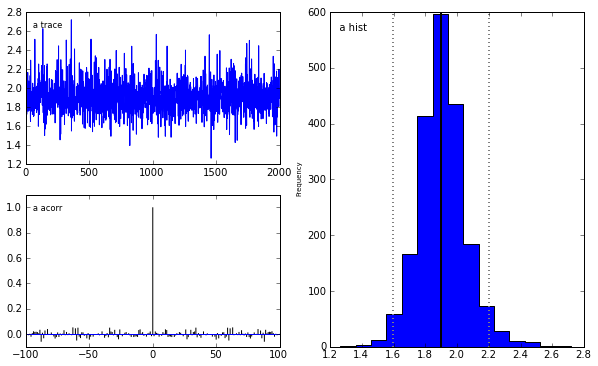

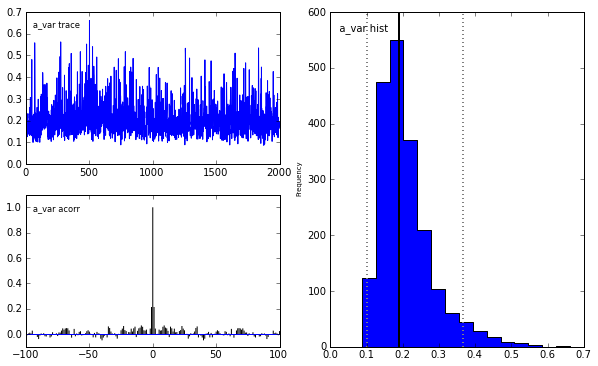

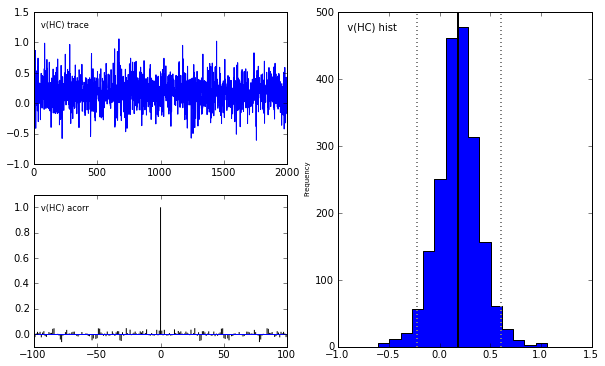

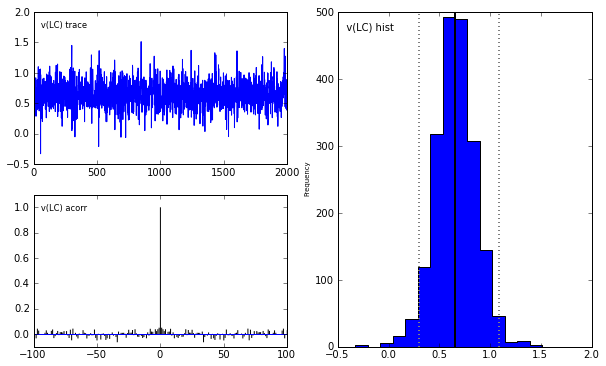

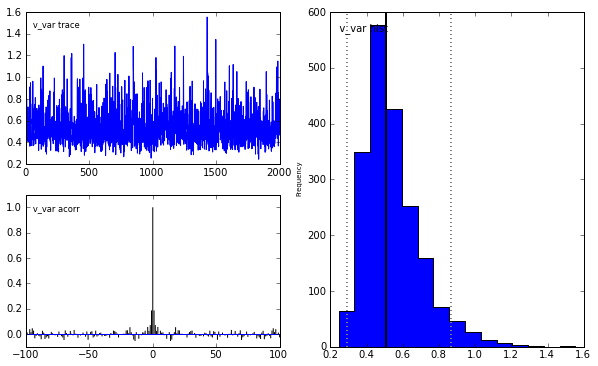

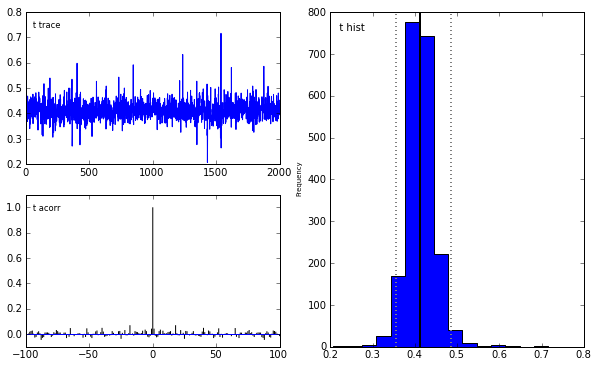

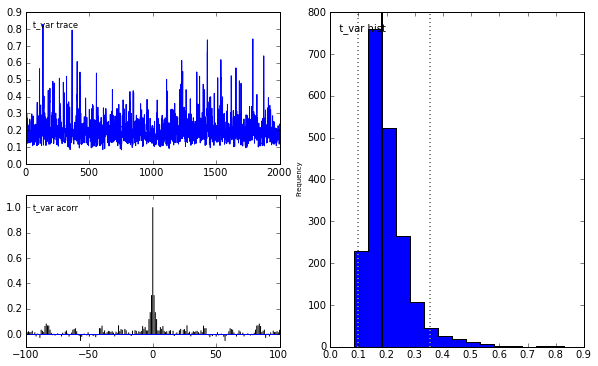

In [21]:
m_conf.plot_posteriors()

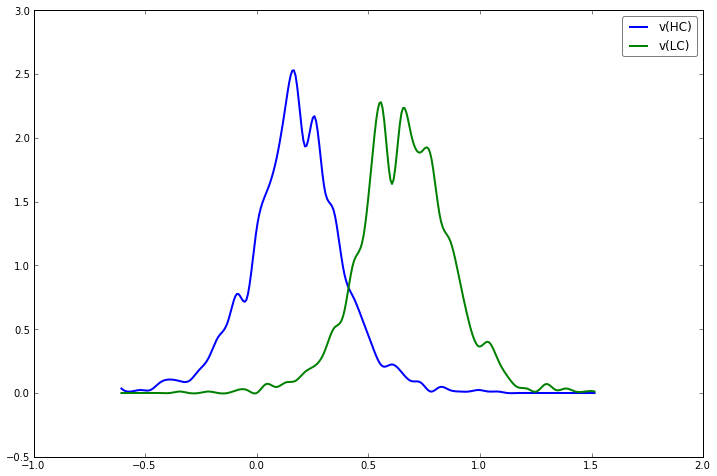

In [22]:
kabuki.analyze.plot_posterior_nodes(m_conf.nodes_db.node[["v(HC)", "v(LC)"]])

In [23]:
print "Lumped model DIC: %f" % m.dic_info()['DIC']
print "Stimulus model DIC: %f" % m_stim.dic_info()['DIC']
print "Conflict model DIC: %f" % m_conf.dic_info()['DIC']

Lumped model DIC: 5809.044698
Stimulus model DIC: 5718.825168
Conflict model DIC: 5712.964223


## Inter-trial variabilities

In [24]:
# generate new simulated data
data_sv, params = hddm.generate.gen_rand_data(
    params={"a": 2, "v": 1, "t": 0.3, "z": 0.3, "sv": 0.2, "st": 0, "sz": 0},
    size=200,
    subjs=8,
)

In [25]:
m_inter = hddm.HDDM(data_sv, include=["v", "a", "t", "z", "sv"])
m_inter.find_starting_values()
m_inter.sample(5000, burn=3000)

[****************100%******************]  5000 of 5000 complete

In [26]:
stats = m_inter.gen_stats()
stats[stats.index.isin(["sv", "z"])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
sv,0.048978,0.061561,0.004568,0.011195,0.028072,0.059076,0.236260,0.005389
z,0.304870,0.050191,0.213121,0.274183,0.301561,0.330907,0.410389,0.001447


Plotting sv
Plotting sv_var
Plotting z


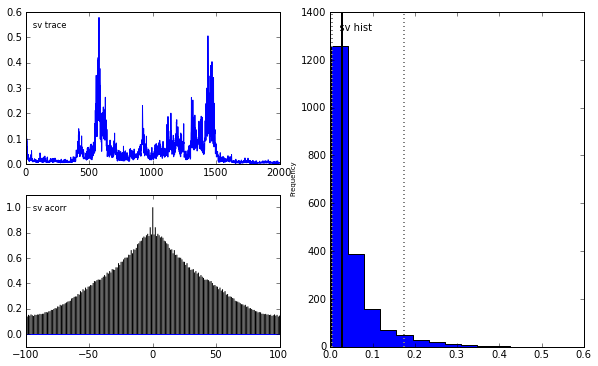

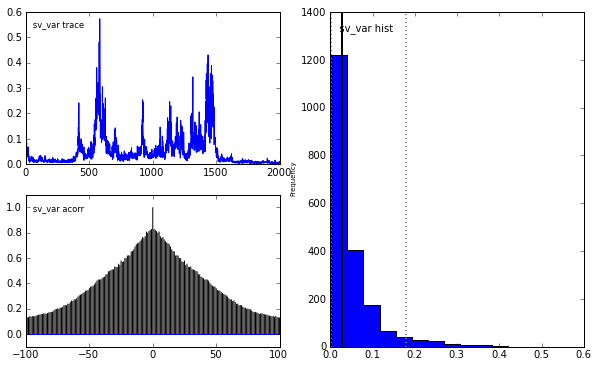

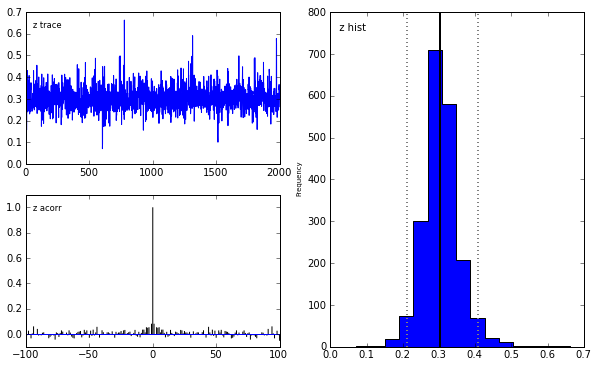

In [27]:
m_inter.plot_posteriors(["sv", "sv_var", "z"])

In [29]:
m_inter_group = hddm.HDDM(
    data_sv, include=["v", "a", "t", "z", "sv"], group_only_nodes=["sv"]
)
m_inter_group.find_starting_values()
m_inter_group.sample(5000, burn=3000)

[****************100%******************]  5000 of 5000 complete

In [30]:
stats = m_inter_group.gen_stats()
stats[stats.index.isin(["sv", "z"])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
sv,4.937688,3.028154,0.651811,2.140814,4.269789,8.266462,9.727480,0.302702
z,0.201378,0.049003,0.127552,0.167821,0.192954,0.227471,0.314912,0.003272


Plotting sv
Plotting z


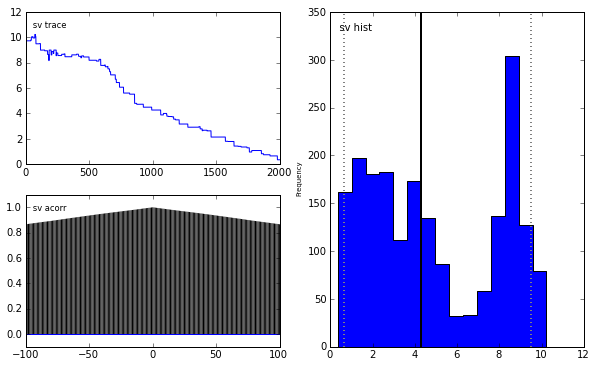

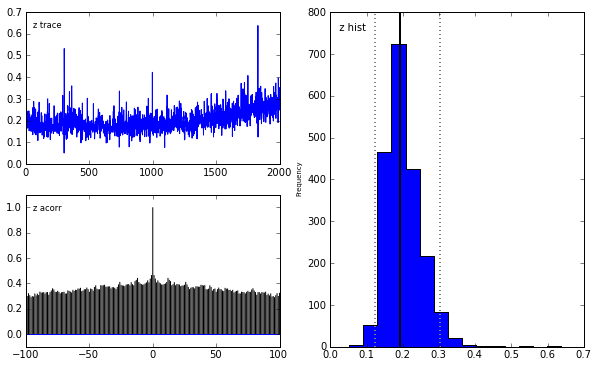

In [31]:
m_inter_group.plot_posteriors(["sv", "z"])

## Running multiple chains (in parallel). This requires the git version of hddm, not 0.4.

In [ ]:
# define a stand-alone function that will be executed remotely
def run_model(id):
    import hddm
    import numpy

    numpy.random.seed(123)
    params = {"a": 2, "v": 1, "t": 0.3, "sv": 0, "st": 0, "sz": 0, "z": 0.5}
    data, _ = hddm.generate.gen_rand_data(params=params, size=300)
    m = hddm.HDDM(data)
    m.find_starting_values()
    m.sample(20000, burn=15000, dbname="db%i" % id, db="pickle")
    return m


from IPython.parallel import Client

job_queue = Client(profile="hddm")[:]
jobs = job_queue.map(run_model, range(8))
models = jobs.get()

In [ ]:
kabuki.analyze.gelman_rubin(models)

## Dealing with outliers

In [ ]:
outlier_data, params = hddm.generate.gen_rand_data(size=200, n_fast_outliers=10)
params

In [ ]:
m_no_outlier = hddm.HDDM(outlier_data)
m_no_outlier.sample(10000, burn=5000)

In [ ]:
m_no_outlier.plot_posterior_predictive(columns=1)

In [ ]:
m_no_outlier.plot_posterior_quantiles(columns=1)

In [ ]:
m_outlier = hddm.HDDM(outlier_data, p_outlier=0.05)
m_outlier.sample(10000, burn=5000)

In [ ]:
m_outlier.gen_stats()

In [ ]:
m_outlier.plot_posterior_predictive(columns=1)

In [ ]:
m_outlier.plot_posterior_quantiles(columns=1)

## Fitting regression models

In [ ]:
data = pd.DataFrame(hddm.load_csv("PD_PS.csv"))

# Define the function to estimate the regression
# lambda is a one-line function definition
reg_func = lambda args, cols: args[0] + args[1] * cols[:, 0]

# Define the regression descriptor where we specify
reg = {
    "func": reg_func,  # which function to use
    "args": ["a_intercept", "a_slope"],  # the input arguments (arbitrary)
    "covariates": "theta",  # the name of column to use for the covariate (will be the argument cols to the function above)
    "outcome": "a",  # which parameter to regress on
}
m_reg = hddm.HDDMRegressor(
    data,
    reg,
    depends_on={"a_slope": "dbs_inv", "v": "conf"},
    group_only_nodes=["a_intercept", "a_slope"],
)

In [ ]:
# Warning, takes a long time to execute!
# m_reg.sample(20000, burn=15000)

In [ ]:
kabuki.analyze.plot_posterior_nodes(
    m_reg.nodes_db.node[["a_slope(0)", "a_slope(1)"]], bins=15
)

For more details, see http://ski.clps.brown.edu/papers/Cavanagh_DBSEEG.pdf

## Posterior Predictive Checks

In [ ]:
from hddm.utils import post_pred_check

post_pred_check(m_no_outlier)

## IPython notebook foo

In [ ]:
%load_ext octavemagic

In [ ]:
%%octave -s 500,500
b = [0.292893218813452, 0.585786437626905, 0.292893218813452];
a = [1,  0,  0.171572875253810];
freqz(b, a, 32);

In [ ]:
%load_ext rmagic
import numpy

X = np.array([0, 1, 2, 3, 4])
Y = np.array([3, 5, 4, 6, 7])

In [ ]:
%%R -i X,Y -o XYcoef
XYlm = lm(Y~X)
XYcoef = coef(XYlm)
print(summary(XYlm))
par(mfrow=c(2,2))
plot(XYlm)